<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 3 Assignment 2*
# Convolutional Neural Networks (CNNs)

# Assignment

Load a pretrained network from Keras, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

ResNet50 = ResNet50(weights='imagenet')
features = model.predict(x)

```

Next you will need to remove the last layer from the ResNet model. Here, we loop over the layers to use the sequential API. There are easier ways to add and remove layers using the Keras functional API, but doing so introduces other complexities. 

```python
# Remote the Last Layer of ResNEt
ResNet50._layers.pop(0)

# Out New Model
model = Sequential()

# Add Pre-trained layers of Old Model to New Model
for layer in ResNet50.layers:
    model.add(layer)

# Turn off additional training of ResNet Layers for speed of assignment
for layer in model.layers:
    layer.trainable = False

# Add New Output Layer to Model
model.add(Dense(1, activation='sigmoid'))
```

Your assignment is to apply the transfer learning above to classify images of Mountains (`./data/mountain/*`) and images of forests (`./data/forest/*`). Treat mountains as the postive class (1) and the forest images as the negative (zero). 

Steps to complete assignment: 
1. Load in Image Data into numpy arrays (`X`) 
2. Create a `y` for the labels
3. Train your model with pretrained layers from resnet
4. Report your model's accuracy

In [26]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential, Model # <- May Use
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [3]:
from tensorflow.keras.models import Sequential, Model # <- May Use

In [ ]:
model = ResNet50(weights='imagenet')

In [ ]:
# features = model.predict(x)

In [ ]:
!pip install imageio

In [ ]:
!pip install scikit-image

In [ ]:
import imageio
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.exposure import rescale_intensity

In [29]:
def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))

In [30]:
# From Jay

data = []
for i in ['forest', 'mountain']:
    for file in os.listdir('./data/'+i):
        if file[-3:] == 'jpg':
            path = os.path.join(f'./data/{i}/' + file)
            img = process_img_path(path)
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)
            data.append(x)

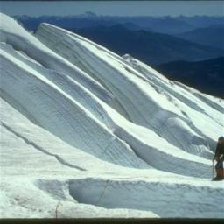

In [24]:
image.load_img('./data/mountain/cdmc181.jpg', target_size=(224,224))

In [5]:
# Read in Data From articles folder

import os

pic_forest = []

pics = os.listdir('./data/forest')

for filename in pics:
    if filename[-3:] == 'jpg':
        path = f'./data/forest/{filename}'
        #print(path)
        with open(path, 'rb') as data:
            content = data.read()
#             print(content)
            pic_forest.append(content)
    return image.load_img(img_path, target_size=(224,224))

In [27]:
pic_mountain = []

pics = os.listdir('./data/mountain')

for filename in pics:
    if filename[-3:] == 'jpg':
        path = f'./data/mountain/{filename}'
        #print(path)
        with open(path, 'rb') as data:
            content = data.read()
#             print(content)
            pic_mountain.append(content)

In [7]:
y = [1] * len(pic_mountain)
y_forests = [0] * len(pic_forest)

for i in y_forests:
    y.append(i)

y = np.asarray(y)

In [19]:
y.shape

(702,)

In [ ]:
# pic_forest

In [8]:
X = pic_mountain

for i in pic_forest:
    X.append(i)

In [31]:
import numpy as np

x = np.asarray(data)

In [32]:
x.shape

(702, 1, 224, 224, 3)

In [33]:
x[0]

array([[[[-103.939, -116.779, -120.68 ],
         [-103.939, -115.779, -118.68 ],
         [-103.939, -116.779, -117.68 ],
         ...,
         [ -97.939, -115.779, -123.68 ],
         [ -83.939, -106.779, -113.68 ],
         [ -94.939, -116.779, -123.68 ]],

        [[-103.939, -116.779, -119.68 ],
         [-103.939, -114.779, -116.68 ],
         [-103.939, -116.779, -115.68 ],
         ...,
         [ -86.939, -104.779, -112.68 ],
         [ -94.939, -112.779, -120.68 ],
         [ -95.939, -116.779, -123.68 ]],

        [[-103.939, -116.779, -116.68 ],
         [-103.939, -115.779, -114.68 ],
         [-103.939, -116.779, -113.68 ],
         ...,
         [-100.939, -115.779, -122.68 ],
         [-101.939, -116.779, -123.68 ],
         [ -97.939, -112.779, -119.68 ]],

        ...,

        [[-102.939, -116.779, -121.68 ],
         [ -91.939, -105.779, -108.68 ],
         [ -98.939, -112.779, -115.68 ],
         ...,
         [-103.939, -111.779, -109.68 ],
         [-103.939, -1

In [34]:
x = x.reshape(702,224,224,3)

In [35]:
x[0]

array([[[-103.939, -116.779, -120.68 ],
        [-103.939, -115.779, -118.68 ],
        [-103.939, -116.779, -117.68 ],
        ...,
        [ -97.939, -115.779, -123.68 ],
        [ -83.939, -106.779, -113.68 ],
        [ -94.939, -116.779, -123.68 ]],

       [[-103.939, -116.779, -119.68 ],
        [-103.939, -114.779, -116.68 ],
        [-103.939, -116.779, -115.68 ],
        ...,
        [ -86.939, -104.779, -112.68 ],
        [ -94.939, -112.779, -120.68 ],
        [ -95.939, -116.779, -123.68 ]],

       [[-103.939, -116.779, -116.68 ],
        [-103.939, -115.779, -114.68 ],
        [-103.939, -116.779, -113.68 ],
        ...,
        [-100.939, -115.779, -122.68 ],
        [-101.939, -116.779, -123.68 ],
        [ -97.939, -112.779, -119.68 ]],

       ...,

       [[-102.939, -116.779, -121.68 ],
        [ -91.939, -105.779, -108.68 ],
        [ -98.939, -112.779, -115.68 ],
        ...,
        [-103.939, -111.779, -109.68 ],
        [-103.939, -116.779, -114.68 ],
        [

In [36]:
x.shape

(702, 224, 224, 3)

In [ ]:
# From Han: "instead of popping layers, just dont include top." 
model = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

In [47]:
def img_contains_mountain(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    print(results)
    for entry in results:
        if entry[1] == 'mountain':
            return entry[2]
    return 0.0

In [43]:
### YOUR CODE HERE

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D

res = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# Remote the Last Layer of ResNE

# make all layers trainable
for layer in res.layers:
    layer.trainable = False
    
# add your head on top
x = res.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(res.input, predictions)

In [45]:
model.summary()

# Holy fuck!!!

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [48]:
img_contains_mountain(process_img_path('./data/mountain/cdmc181.jpg'))

[('n09193705', 'alp', 0.78818536), ('n09468604', 'valley', 0.0799365), ('n04228054', 'ski', 0.069679774)]


0.0

In [ ]:
img_contains_mountain(process_img_path('./data/mountain/cdmc181.jpg'))

In [20]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))

def img_contains_mountain(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    print(results)
    for entry in results:
        if entry[1] == 'mountain':
            return entry[2]
    return 0.0

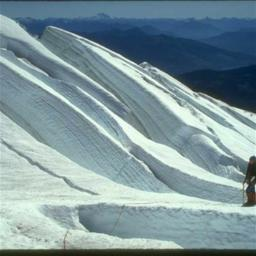

In [23]:
from IPython.display import Image
Image(filename='./data/mountain/cdmc181.jpg', width=600)

In [24]:
img_contains_mountain(process_img_path('./data/mountain/cdmc181.jpg'))

40960/35363 [==================================] - 0s 1us/step
[('n09193705', 'alp', 0.78818536), ('n09468604', 'valley', 0.0799365), ('n04228054', 'ski', 0.069679774)]


0.0

# Resources and Stretch Goals

Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language